In [29]:
import json
import ml_helper
import ml_plots
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.gridspec as gridspec
from sklearn.linear_model import LinearRegression

In [30]:
COLORS = {
    
    'yellow': '#FFBE0B',
    'orange': '#FB5607',
    'blue': '#3A86FF',
    'pink': '#FF006E' ,
    'lila': '#8338EC',
    'rot':  '#2a9d8f' 
}

In [31]:
# load latest data if keyword is in the file name
hist_name_cnn_norm = ml_helper.get_newest_file('histories/', name='CNN_history', extension=".json", ensemble=False)
print(f"Loading {hist_name_cnn_norm}")

hist_name_cnn = ml_helper.get_newest_file('histories/', name='CNN', extension=".json", ensemble=True)
print(f"Loading {hist_name_cnn}")
hist_name_cnn = hist_name_cnn[1:]

Loading histories/CNN_history_2025-02-16_18-41-29.json
Loading ['histories/ensemble_preds_CNN_2025-02-16_18-06-10.json', 'histories/CNN_6_ensemble_history_2025-02-16_18-06-10.json', 'histories/CNN_5_ensemble_history_2025-02-16_18-06-10.json', 'histories/CNN_4_ensemble_history_2025-02-16_18-06-10.json', 'histories/CNN_3_ensemble_history_2025-02-16_18-06-10.json', 'histories/CNN_2_ensemble_history_2025-02-16_18-06-10.json', 'histories/CNN_1_ensemble_history_2025-02-16_18-06-10.json', 'histories/CNN_0_ensemble_history_2025-02-16_18-06-10.json']


In [32]:
with open("histories/ensemble_preds_CNN_2025-02-16_18-06-10.json", 'r') as file:
  ensemble_avg_prediction = json.load(file)
  print(len(ensemble_avg_prediction))
 

494


In [33]:
with open(hist_name_cnn_norm, 'r') as file:
    hist_cnn_norm = json.load(file)

labels_cnn_norm = hist_cnn_norm['test_labels']
preds_cnn_norm = hist_cnn_norm['test_preds']

In [34]:
with open(hist_name_cnn[0], 'r') as file:
    hist_cnn = json.load(file)
(len(hist_cnn))
labels_cnn = hist_cnn['test_labels']
preds_cnn = hist_cnn['test_preds']

In [35]:
with open(hist_name_cnn[1], 'r') as file:
    hist_cnn1 = json.load(file)

labels_cnn1 = hist_cnn1['test_labels']
preds_cnn1 = hist_cnn1['test_preds']

In [36]:
with open(hist_name_cnn[2], 'r') as file:
    hist_cnn2 = json.load(file)

labels_cnn2 = hist_cnn2['test_labels']
preds_cnn2 = hist_cnn2['test_preds']

In [37]:
with open(hist_name_cnn[4], 'r') as file:
    hist_cnn3 = json.load(file)

labels_cnn3 = hist_cnn3['test_labels']
preds_cnn3 = hist_cnn3['test_preds']

In [38]:
with open(hist_name_cnn[5], 'r') as file:
    hist_cnn4 = json.load(file)

labels_cnn4 = hist_cnn4['test_labels']
preds_cnn4 = hist_cnn4['test_preds']

In [39]:
def save_plot(plt, title):
    pass

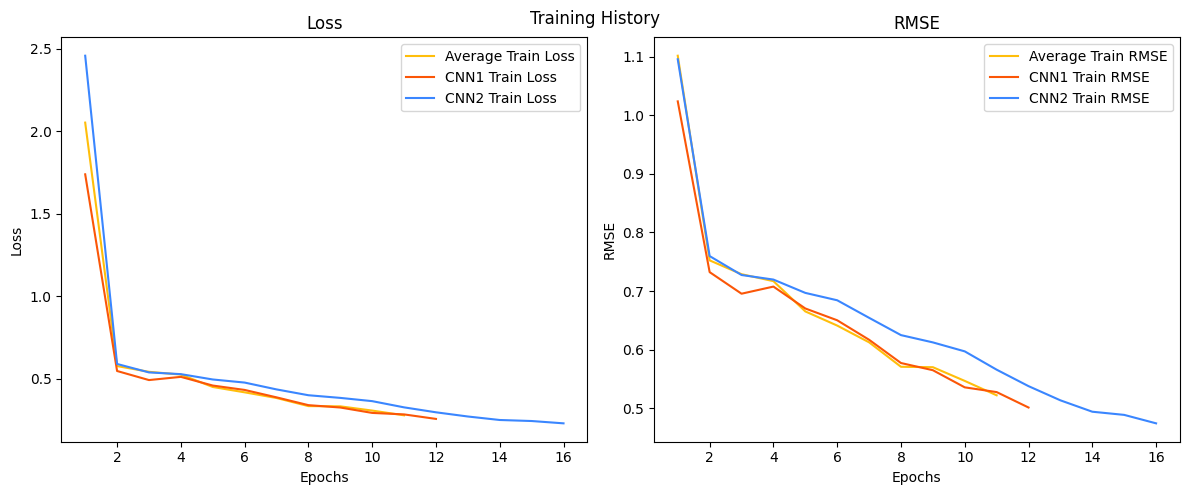

In [40]:
def plot_training_histories(hist_datas, names, colors, title='Training History', include_val=True, save=True):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    color_keys = list(colors.keys())
    color_counter = 0

    for hist_data, name in zip(hist_datas, names):
        epochs = range(1, len(hist_data['train_loss']) + 1)

        color = colors[color_keys[color_counter]]
        color_counter = (color_counter + 1) % len(color_keys)

        # Plot RMSE
        axs[1].plot(epochs, hist_data['train_rmse'], label=f'{name} Train RMSE', color=color)
        if include_val:
            axs[1].plot(epochs, hist_data['val_rmse'], label=f'{name} Validation RMSE', color=color, linestyle='dashed')
        axs[1].set_title('RMSE')
        axs[1].set_xlabel('Epochs')
        axs[1].set_ylabel('RMSE')
        axs[1].legend()

        # Plot Loss
        axs[0].plot(epochs, hist_data['train_loss'], label=f'{name} Train Loss', color=color)
        if include_val:
            axs[0].plot(epochs, hist_data['val_loss'], label=f'{name} Validation Loss', color=color, linestyle='dashed')
        axs[0].set_title('Loss')
        axs[0].set_xlabel('Epochs')
        axs[0].set_ylabel('Loss')
        axs[0].legend()

    plt.tight_layout()
    plt.suptitle(title)

    # Save plot
    if save:
        save_plot(plt, title)
    
    return plt

plot_training_histories([hist_cnn, hist_cnn2, hist_cnn3], ['Average', 'CNN1', 'CNN2'], colors=COLORS, include_val=False).show()

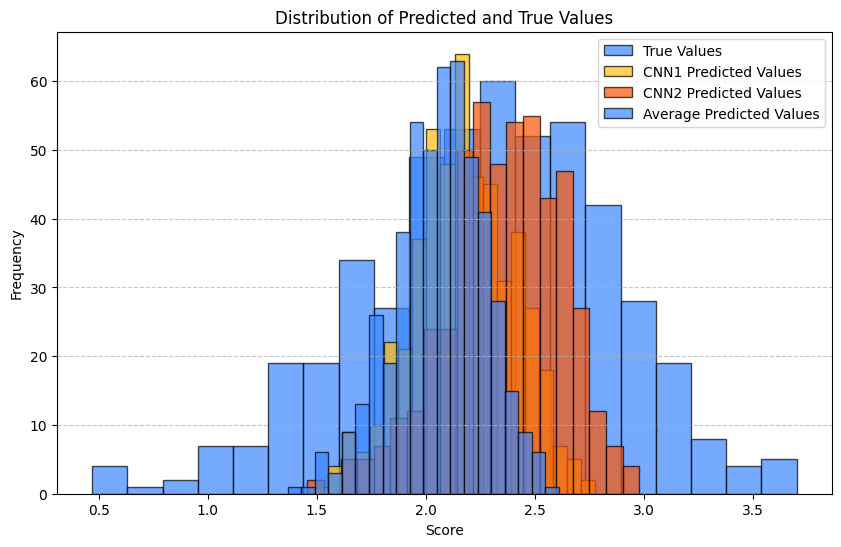

In [41]:
def plot_distributions(true_values, predicted_values_list, names, colors, title='Distribution of Predicted and True Values', save=True):
    plt.figure(figsize=(10, 6))
    color_keys = list(colors.keys())
    color_counter = 0

    # Plot true values
    plt.hist(true_values, bins=20, color=colors["blue"], edgecolor='black', alpha=0.7, label='True Values')

    # Plot predicted values for each model
    for predicted_values, name in zip(predicted_values_list, names):
        color = colors[color_keys[color_counter]]
        color_counter = (color_counter + 1) % len(color_keys)
        plt.hist(predicted_values, bins=20, color=color, edgecolor='black', alpha=0.7, label=f'{name} Predicted Values')

    plt.title(title)
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # save plot
    if save:
        save_plot(plt, title)
    return plt

plot_distributions(labels_cnn,[ preds_cnn2, preds_cnn3, ensemble_avg_prediction ], [  'CNN1', 'CNN2', 'Average'], colors=COLORS).show()


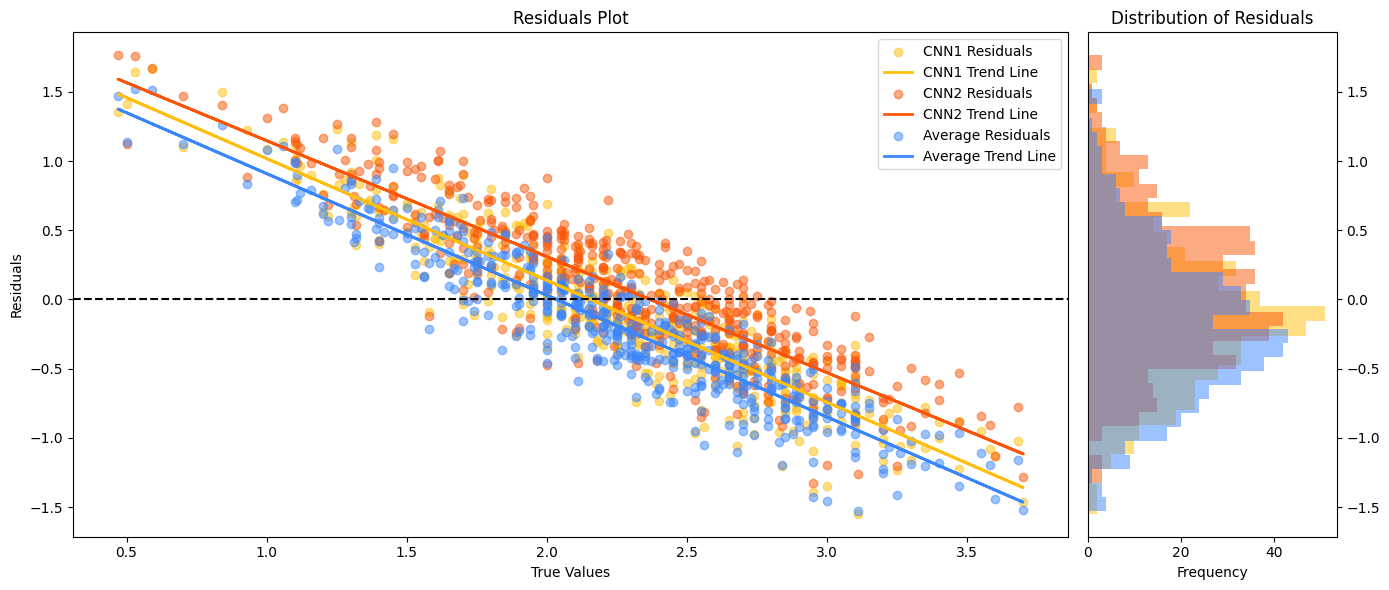

In [42]:

def plot_multiple_residuals(labels, preds_list, names, colors, title='Residuals Plot', save=True):
    fig = plt.figure(figsize=(14, 6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1])
    color_keys = list(colors.keys())
    color_counter = 0

    # Main plot
    ax0 = plt.subplot(gs[0])

    for preds, name in zip(preds_list, names):
        residuals = np.array(preds) - np.array(labels)
        color = colors[color_keys[color_counter]]
        color_counter = (color_counter + 1) % len(color_keys)

        ax0.scatter(labels, residuals, label=f'{name} Residuals', color=color, alpha=0.5)

        # Fit linear regression model to residuals
        labels_reshaped = np.array(labels).reshape(-1, 1)
        model = LinearRegression()
        model.fit(labels_reshaped, residuals)
        trend_line = model.predict(labels_reshaped)

        # Plot trend line
        ax0.plot(labels, trend_line, color=color, label=f'{name} Trend Line', linewidth=2)

    ax0.set_xlabel('True Values')
    ax0.set_ylabel('Residuals')
    ax0.axhline(y=0, color='k', linestyle='--')
    ax0.set_title(title)
    ax0.legend()

    color_counter = 0
    # Side plot for distribution of residuals
    ax1 = plt.subplot(gs[1], sharey=ax0)
    for preds, name in zip(preds_list, names):
        residuals = np.array(preds) - np.array(labels)
        color = colors[color_keys[color_counter]]
        color_counter = (color_counter + 1) % len(color_keys)
        ax1.hist(residuals, bins=30, alpha=0.5, color=color, orientation='horizontal', label=f'{name} Residuals')

    ax1.set_xlabel('Frequency')
    ax1.set_title('Distribution of Residuals')
    ax1.yaxis.tick_right()
    ax1.yaxis.set_label_position("right")

    plt.tight_layout()
    # Save plot
    if save:
        save_plot(plt, title)
    
    return plt
plot_multiple_residuals(labels_cnn, [preds_cnn2, preds_cnn3, ensemble_avg_prediction], ['CNN1', 'CNN2', 'Average'], colors=COLORS).show()

In [43]:
mse_t = np.sqrt(mean_squared_error(labels_cnn_norm, preds_cnn_norm))
mae_t = mean_absolute_error(labels_cnn_norm, preds_cnn_norm)
r2_t = r2_score(labels_cnn_norm, preds_cnn_norm)

mse_ensemble = np.sqrt(mean_squared_error(labels_cnn1, ensemble_avg_prediction))
mae_ensemble = mean_absolute_error(labels_cnn1, ensemble_avg_prediction)
r2_ensemble = r2_score(labels_cnn1, ensemble_avg_prediction)

df = pd.DataFrame([[mse_ensemble, mae_ensemble, r2_ensemble], [mse_t, mae_t, r2_t]],
                  columns=['RMSE', 'MAE', 'R2'],
                  index=['Ensemble Model', 'Single Model'])
print(df)

                    RMSE       MAE        R2
Ensemble Model  0.576617  0.468167 -0.038697
Single Model    0.522875  0.418756  0.145897
